# Logistic Regression

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]

Currenty the features have different scales. In the current setting age and sodium to potassium ratio have a far greater influence as their values are much larger. I will use *StandardScaler* to perform a standardization.

In [4]:
stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

Perform Grid Search to search for best hyperparameters.

In [43]:
lr = LogisticRegression()
param_grid = {
    "C": [0.1, 1, 5, 6, 7, 8, 10, 15, 20]
}

grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 5, 6, 7, 8, 10, 15, 20]},
             scoring='accuracy')

In [44]:
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'C': 8}
Best score:  0.66875


In [45]:
r = grid_search.cv_results_
print(r["params"])
print(r["mean_test_score"])

[{'C': 0.1}, {'C': 1}, {'C': 5}, {'C': 6}, {'C': 7}, {'C': 8}, {'C': 10}, {'C': 15}, {'C': 20}]
[0.6625  0.63125 0.65    0.65625 0.6625  0.66875 0.66875 0.66875 0.66875]


The model with the best performance has the hyperparameter C = 8.

Next the logistic regression is trained.

In [46]:
lr = LogisticRegression(C = 8)
lr.fit(X_train, y_train)

LogisticRegression(C=8)

Make prediction.

In [47]:
predictions = lr.predict(X_test)

Now the performance is evaluated.

The accuracy is at 0.73, this is far higher than the baseline model. All of drugs Y were correctly classified (recall = 1), of the classified drugs Y 90% were correct (precision = 0.9). The model managed to perform well classifying drug X: 82% of these were correctly classified. However out of the classifications only 60% were correct. The values are even lower for drugs C and B. Drug A was never predicted.

In [48]:
c = classification_report(y_test, predictions)
print(c)

              precision    recall  f1-score   support

           A       0.00      0.00      0.00         5
           B       0.50      0.33      0.40         3
           C       0.50      0.33      0.40         3
           X       0.60      0.82      0.69        11
           Y       0.90      1.00      0.95        18

    accuracy                           0.73        40
   macro avg       0.50      0.50      0.49        40
weighted avg       0.64      0.72      0.68        40



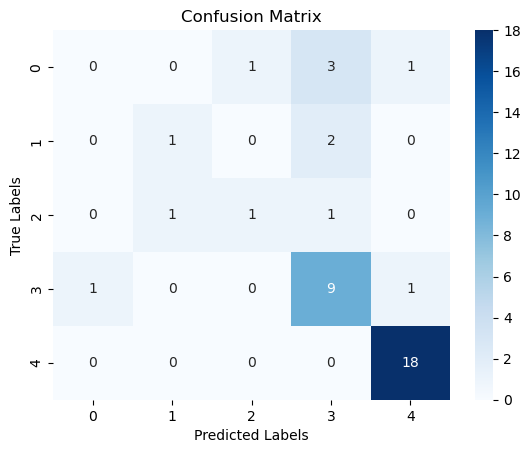

In [49]:
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()